# Project: Used Turkish Cars - Whats important in used turkish cars?



## About the dataset



| ListingTitle           | ilanBasligi      | Title of the vehicle listing                      |
| ---------------------- | ---------------- | ------------------------------------------------- |
| District               | adres            | District or neighborhood of the listing)          |
| City                   | il               | City where the vehicle is located                 |
| Price(TRY)             | fiyat(TRY)       | Listed price of the vehicle in Turkish Lira       |
| ListingID              | ilanID           | Unique identifier of the listing                  |
| ListingDate            | ilanTarihi       | Date when the listing was posted                  |
| Brand                  | marka            | Brand of the vehicle                              |
| Series                 | seri             | Sub-series or model family                        |
| Model                  | model            | Specific model of the vehicle                     |
| Year                   | yıl              | Year of manufacture                               |
| Mileage(km)            | kilometre(Km)    | Total distance traveled (in kilometers)           |
| TransmissionType       | vitesTipi        | Type of transmission (automatic/manual            |
| FuelType               | yakitTuru        | Type of fuel used (e.g. petrol, diesel)           |
| BodyType               | kasaTipi         | Body style of the vehicle (e.g. sedan, hatchback) |
| Color                  | renk             | Exterior color of the vehicle                     |
| EngineSize(cc)         | motorHacmi(Cc)   | Engine volume/displacement in cubic centimeters   |
| EnginePower(HP)        | motorGucu(HP)    | Engine power in horsepower                        |
| DriveTrain             | cekisTipi        | Drivetrain type (e.g. FWD, RWD, AWD)              |
| PaintAndPartsCondition | boyaParcaDurumu  | Info on which parts are repainted or replaced     |
| TradeInAvailable       | takasUygunluk    | Whether the seller accepts trade-in               |
| SellerType             | saticiTuru       | Type of seller (individual, dealer)               |
| VehicleTax(TRY)        | aracVergisi(TRY) | Annual tax of the vehicle in TRY                  |
| AccidentHistory        | hasarGecmisi     | Any known accident histor                         |


## Missing Value Notes

Some rows contain missing values due to incomplete information provided by sellers. These mostly occur in columns like:

```
PaintAndPartsCondition
TradeInAvailable
SellerType
VehicleTax(TRY)
AccidentHistory
```

## Other uses for this dataset

```
Vehicle price prediction (regression)
NLP on listing titles
Feature importance analysis
Web scraping and data cleaning examples
```

# A. [Business Question]: Hypothesis

The bank suspects the at `age`, `balance`, and `geography` might be important factors that lead to a customer leaving the bank

## Download the dataset

In [ ]:
!gdown 1kVQbJJAMCGJrFKe_1vql0bYLC0hlA2dL
!pip install case-converter plotly seaborn statsmodels

Downloading...
From: https://drive.google.com/uc?id=1kVQbJJAMCGJrFKe_1vql0bYLC0hlA2dL
To: /content/used_turkish_cars_en.csv
100% 3.40M/3.40M [00:00<00:00, 51.2MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import plotly.express as px

In [ ]:

df = pd.read_csv("./used_turkish_cars_en.csv")
print("number of rows: {:,}".format(df.shape[0]))
print(df.head(1).transpose().to_markdown())



number of rows: 6,675
|                        | 0                                                                                                                                                                                                                                                                         |
|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingTitle           | 2016 AUDİ A3 SPORTBACK 1.0 TFSI BOYASIZ/DEĞİŞENSİZ/TRAMERSİZ____                                                                                                                                                                                                          |
| District               | Aşağısoku Mh. Merkez                                              

In [ ]:
df.head()

,ListingTitle,District,City,Price(TRY),ListingID,ListingDate,Brand,Series,Model,Year,...,BodyType,Color,EngineSize(cc),EnginePower(HP),DriveTrain,PaintAndPartsCondition,TradeInAvailable,SellerType,VehicleTax(TRY),AccidentHistory
0,2016 AUDİ A3 SPORTBACK 1.0 TFSI BOYASIZ/DEĞİŞE...,Aşağısoku Mh. Merkez,Bolu,1.169.000 TL,27812680,07 April 2025,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,2016.0,...,Hatchback/5,White,1200 cm3' e kadar,101 - 125 HP,FWD,Original Right Rear Fender Trunk Lid Left R...,Trade-In Accepted,NaN,NaN,NaN
1,2018 AUDİ A6 2.0 TDI QUATTRO SUNROOF MATRİX VA...,Güneşevler Mh. Altındağ,Ankara,2.450.000 TL,28816234,07 April 2025,Audi,A6,A6 Sedan 2.0 TDI Quattro,2018.0,...,Sedan,Black,1968 cc,190 hp,AWD,Original Trunk Lid Right Rear Door Right Fr...,Trade-In Not Accepted,Dealer,NaN,Amount not specified
2,Sahibinden Audi A4 Sedan 1.8 TFSI 2011 Model,Burmalı Mh. Merkez,Afyonkarahisar,750.000 TL,28781662,08 April 2025,Audi,A4,A4 Sedan 1.8 TFSI,2011.0,...,Sedan,White,1798 cc,160 hp,FWD,Original Roof Left Front Door Hood Front B...,Trade-In Not Accepted,Private Seller,2.013,75.000
3,2016 AUDI A3 AMBİENTE *CAM TAVAN LED XENON HIZ...,Ilıca Mh. Manavgat,Antalya,1.195.000 TL,28731117,03 April 2025,Audi,A3,A3 Sportback 1.6 TDI Ambiente,2016.0,...,Hatchback/5,Black,1598 cc,110 hp,FWD,Original Right Rear Fender Trunk Lid Right ...,Trade-In Accepted,Dealer,1.606,No tram amount
4,Sahibinden Audi A3 Sportback 1.6 TDI S-Line 20...,Uğur Mumcu Mh. Yenimahalle,Ankara,822.000 TL,28393351,02 April 2025,Audi,A3,A3 Sportback 1.6 TDI Attraction,2012.0,...,Hatchback/5,White,1598 cc,105 hp,FWD,Original Right Rear Fender Trunk Lid Left R...,NaN,NaN,NaN,Amount not specified


#Logistic Regression

In [ ]:
df["Price(TRY)"] = pd.to_numeric(df["Price(TRY)"].astype(str)
                                 .str.replace(r"[^\d]", "", regex=True), errors='coerce')
df["Mileage(km)"] = pd.to_numeric(df["Mileage(km)"].astype(str)
                                  .str.replace(r"[^\d]", "", regex=True), errors='coerce')
df["EngineSize(cc)"] = pd.to_numeric(df["EngineSize(cc)"].astype(str)
                                     .str.extract(r'(\d+)')[0], errors='coerce')
df["EnginePower(HP)"] = pd.to_numeric(df["EnginePower(HP)"].astype(str)
                                      .str.extract(r'(\d+)')[0], errors='coerce')

In [ ]:
#our target varibale
#find the value below which 66% of prices fall
price_threshold = df["Price(TRY)"].quantile(0.66)
df["is_high_price"] = (df["Price(TRY)"] >= price_threshold) * 1.0



In [ ]:
#select features and target
categorical_cols = ["Brand", "FuelType", "TransmissionType", "BodyType", "Color", "Series", "Model", "DriveTrain"]
numeric_cols = ["Year", "Mileage(km)", "EngineSize(cc)", "EnginePower(HP)"]
independent_variables = numeric_cols + categorical_cols
dependent_variable = ["is_high_price"]


In [ ]:
#drrop rows with nulls in selected columns

cols_needed = independent_variables + dependent_variable
df = df.dropna(subset=cols_needed)


In [ ]:
#convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(df[independent_variables], drop_first=True)
y = df[dependent_variable]


In [ ]:

#split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
#training logistic regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#outputt model parameters
print("Coefficients:\n")
for coef, col in zip(model.coef_[0], X.columns):
    print(f"{col}: {coef:.4f}")
print("\nIntercept:", model.intercept_[0])


Coefficients:

Year: 3.5313
Mileage(km): -1.7929
EngineSize(cc): 0.0976
EnginePower(HP): 1.5548
Brand_Aston Martin: 0.0000
Brand_Audi: 2.2108
Brand_BMW: 0.9198
Brand_Bentley: 0.0000
Brand_Chevrolet: -0.4000
Brand_Citroen: -0.6170
Brand_Dacia: -0.2882
Brand_Daihatsu: -0.0027
Brand_Fiat: -1.9132
Brand_Ford: -0.2393
Brand_Honda: 0.5891
Brand_Hyundai: -0.8137
Brand_Kia: -0.5033
Brand_Lada: -0.0012
Brand_MINI: 0.0009
Brand_Mazda: -0.0001
Brand_Mercedes - Benz: 0.7369
Brand_Nissan: 0.2990
Brand_Opel: -0.9598
Brand_Peugeot: -1.5261
Brand_Porsche: 0.0020
Brand_Renault: -1.3152
Brand_Seat: 0.5358
Brand_Skoda: 0.3267
Brand_Suzuki: -0.0003
Brand_Tata: -0.0028
Brand_Tofaş: -0.0109
Brand_Toyota: 0.8302
Brand_Volkswagen: 0.9779
Brand_Volvo: 0.0197
FuelType_Gasoline: -0.9920
FuelType_Hybrid: -0.1468
FuelType_LPG & Gasoline: -0.5586
TransmissionType_Manual: -1.1964
TransmissionType_Semi-Automatic: 0.0271
BodyType_Coupe: -0.2267
BodyType_Hatchback/3: -1.0680
BodyType_Hatchback/5: -1.0161
BodyType_MPV: 

In [ ]:
#outputt model parameters
print("Coefficients:\n", model.coef_)
print("Intercept:\n", model.intercept_)


Coefficients:
 [[ 3.53134422e+00 -1.79291854e+00  9.75884751e-02 ...  6.79514553e-05
  -5.39372909e-01  1.70789822e+00]]
Intercept:
 [0.22273611]


In [ ]:
# ------------------- PREDICTIONS -------------------
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:, 1]

# ------------------- EVALUATION -------------------
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Model Accuracy:", model.score(X_test, y_test))
print("ROC AUC Score:", roc_auc_score(y_test, y_score))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       549
         1.0       0.87      0.97      0.92       261

    accuracy                           0.94       810
   macro avg       0.93      0.95      0.94       810
weighted avg       0.95      0.94      0.95       810

Model Accuracy: 0.9444444444444444
ROC AUC Score: 0.9932862955286169


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
ref_df = pd.DataFrame({'fpr': np.linspace(0,1,50), 'tpr': np.linspace(0,1,50)})

fig = px.line(roc_df, x='fpr', y='tpr', title='ROC Curve',
              labels={'fpr': 'False Positive Rate', 'tpr': 'True Positive Rate'})
fig.add_scatter(x=ref_df['fpr'], y=ref_df['tpr'], mode='markers',
                name='Random Classifier', marker=dict(color='red'))
fig.show()

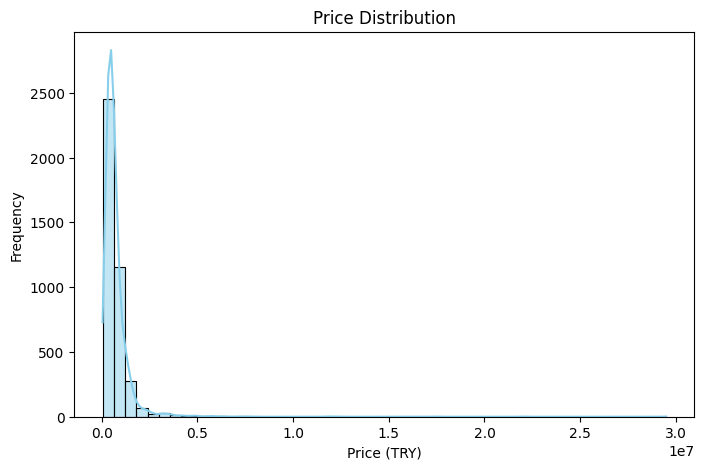

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price(TRY)"], bins=50, kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price (TRY)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-2370984368.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-2370984368.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




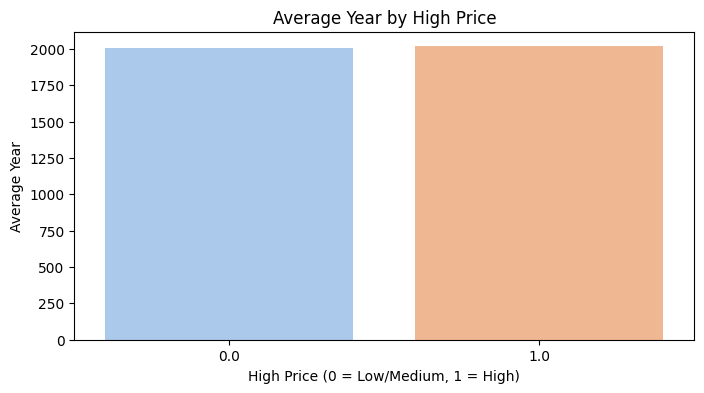

/tmp/ipython-input-2370984368.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-2370984368.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




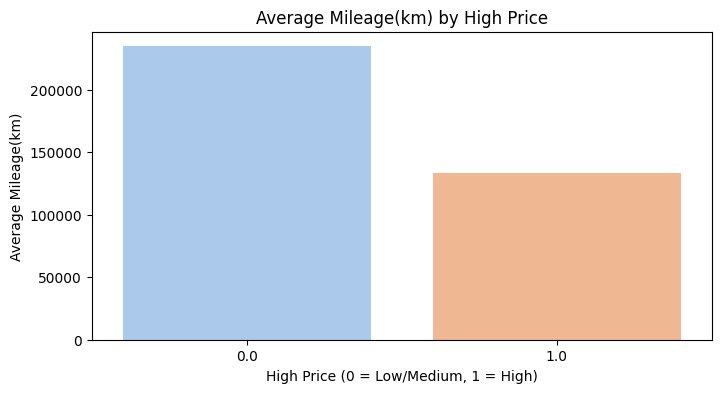

/tmp/ipython-input-2370984368.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-2370984368.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




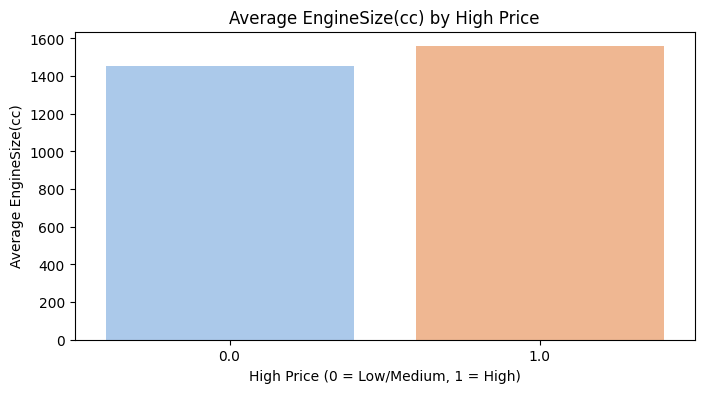

/tmp/ipython-input-2370984368.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-2370984368.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




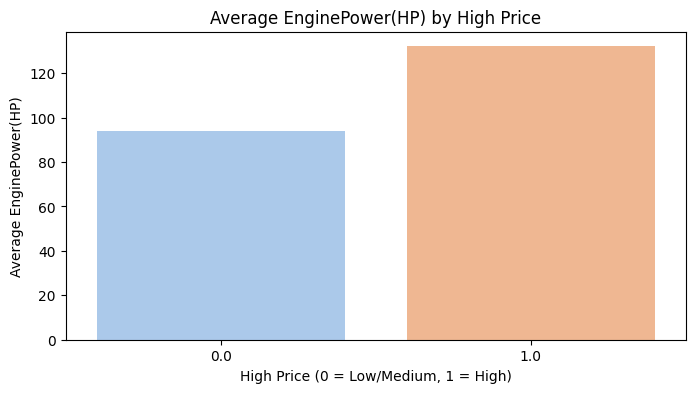

In [ ]:

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x="is_high_price", y=col, data=df, ci=None, palette="pastel")
    plt.title(f"Average {col} by High Price")
    plt.xlabel("High Price (0 = Low/Medium, 1 = High)")
    plt.ylabel(f"Average {col}")
    plt.show()
